# Practical Lab 1 - Univariate Linear Regression on the California Housing Prices Dataset

## Name: Shruti Patel
## Id: 8974438

### **Part 1: Goal of this report**
- **Linear Regression** is a fundamental algorithm in machine learning that predicts a target variable by fitting the best linear relationship between the dependent and independent variable (or variables). 
- The main objective of performing this practical is to show how dependent variable **Median House Value** is affected by the independent variables **Median Income**, **Population**, and **number of households**. which, basically shows that how much variation is there among prediction and actual values bteween parameters. Higher co-relation shows that model is actually best fit for analysis else there is a room for further improvements.


### **Part 2:  Importing the Data and loading it into the Pandas**

For this practical, **California housing data** is taken from the popular website called **Kaggle**. click here to get the [Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Admin/Downloads/FML_L1_dataset/housing.csv")

### **Part 3: Exploratory Data Analysis (EDA)**

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
# Check for missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Explanation:** The output indicates that there are no missing values for any of the parameters except total_bedrooms which is 207. but,here the key parameters are very less likely to be affected by it. so, it can be negleted.

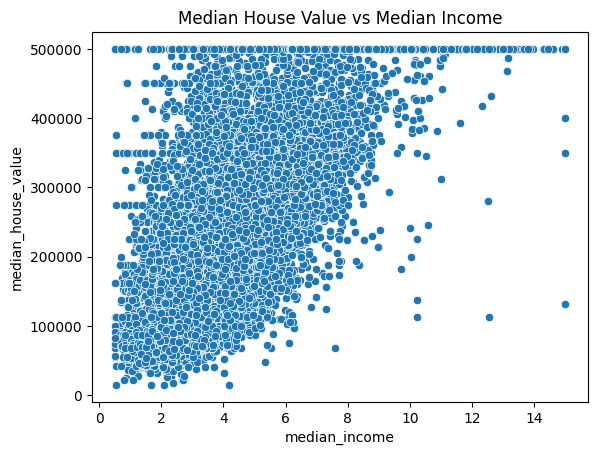

In [5]:
# Scatter plot of Median House Value vs Median Income
sns.scatterplot(data=df, x='median_income', y='median_house_value')
plt.title('Median House Value vs Median Income')
plt.show()

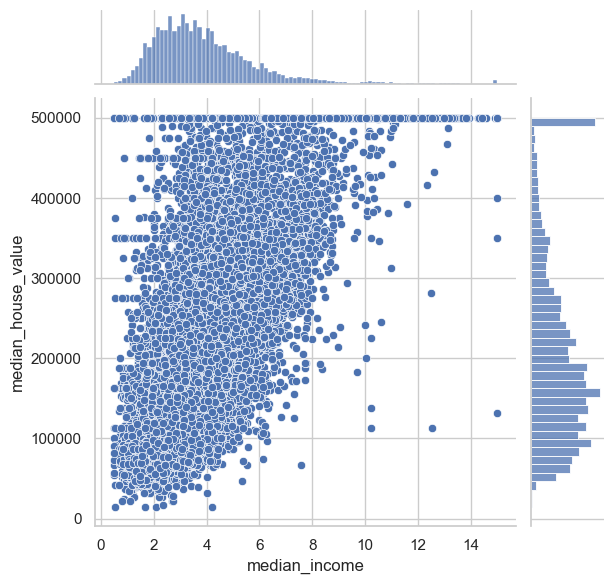

In [12]:
# using seaborn scatter plot, plotting the median_house_value vs median_income

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=df)

**Explanation:** The scatter plot shows a strong **"positive correlation"** between **median income** and **median house value**.
Higher-income regions tend to have more expensive houses.
This shows that median income is likely the most significant predictor for linear regression model.

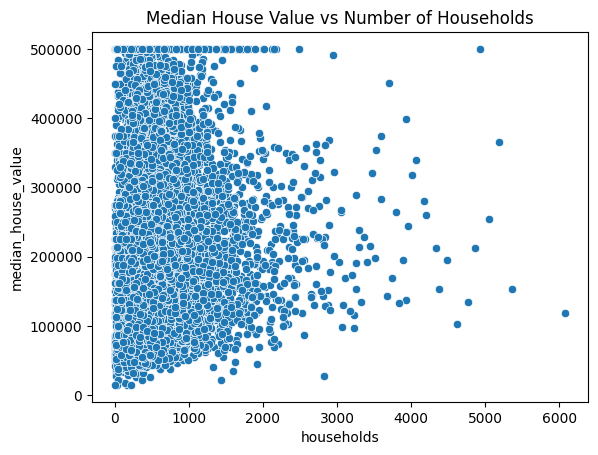

In [6]:
# Scatter plot of Median House Value vs Number of Households
sns.scatterplot(data=df, x='households', y='median_house_value')
plt.title('Median House Value vs Number of Households')
plt.show()

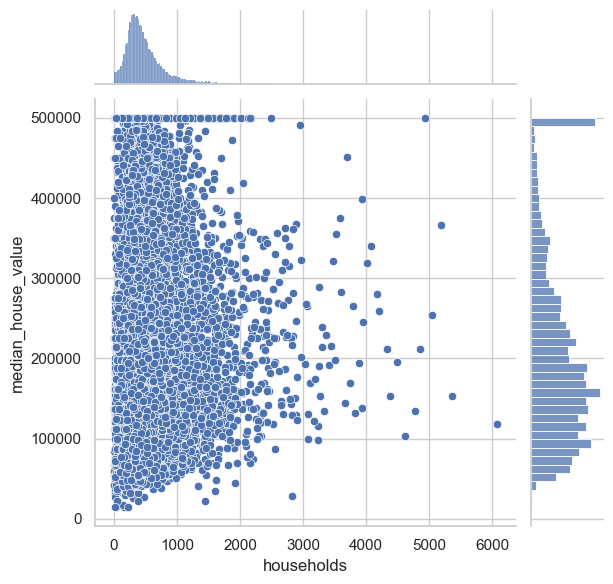

In [13]:
# using seaborn scatter plot, plotting the median_house_value vs households

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="households", y="median_house_value", data=df)

**Explanation:** The spread of points is wide and **lacks a clear trend**, which shows that households have a **weak linear relationship** with house prices. This is unlike median income, which showed a clearer positive correlation.

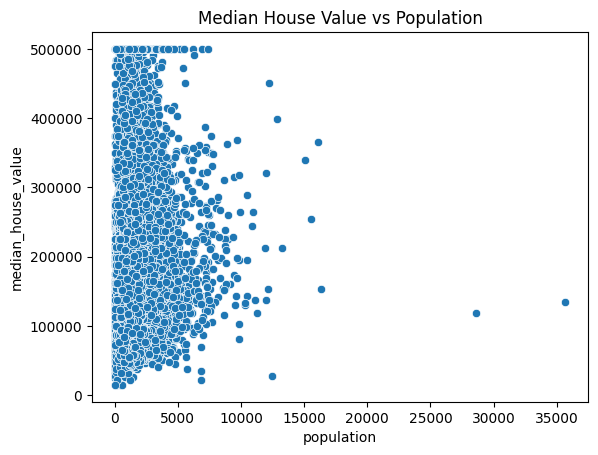

In [7]:
# Scatter plot of Median House Value vs Population
sns.scatterplot(data=df, x='population', y='median_house_value')
plt.title('Median House Value vs Population')
plt.show()

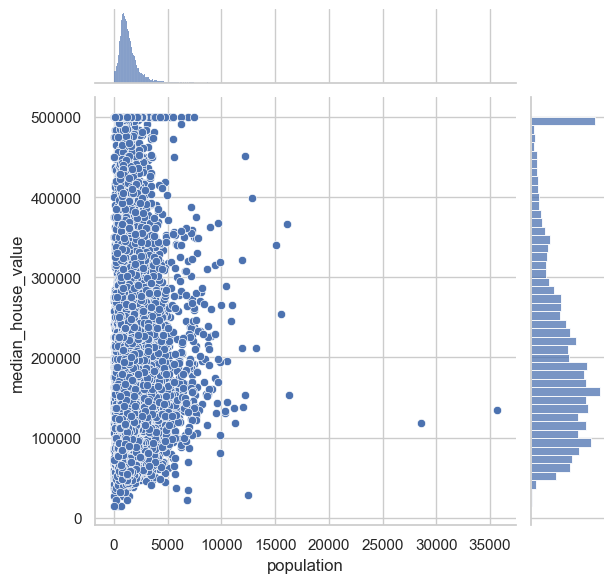

In [15]:
# using seaborn scatter plot, plotting the median_house_value vs polulation

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="population", y="median_house_value", data=df)

**Explanation:** There is **"no clear linear relationship"** between **population** and **house value**. Some high-population areas have low house values, while others have high values. This shows that population alone is not a strong predictor of house value.

**Insights for Linear Regression:**
- Median Income is the strongest predictor and should have the highest impact on the model.
- Population and number of households may not contribute much individually but could still provide useful information when combined with other variables.
- Outlier such as extreme house values may slightly affect model performance.

### **Data Preprocessing**

- Filtering out records with median_house_value = 500001 since it is a cap for the median_house_value.

In [8]:
df_preprocessed = df[df.median_house_value != 500001]

In [10]:
print(f"After filtering, there are {len(df_preprocessed)} records, versus {len(df)} before filtering")

After filtering, there are 19675 records, versus 20640 before filtering


- Now it's time to explore the same jointplots againto visualize the differences.

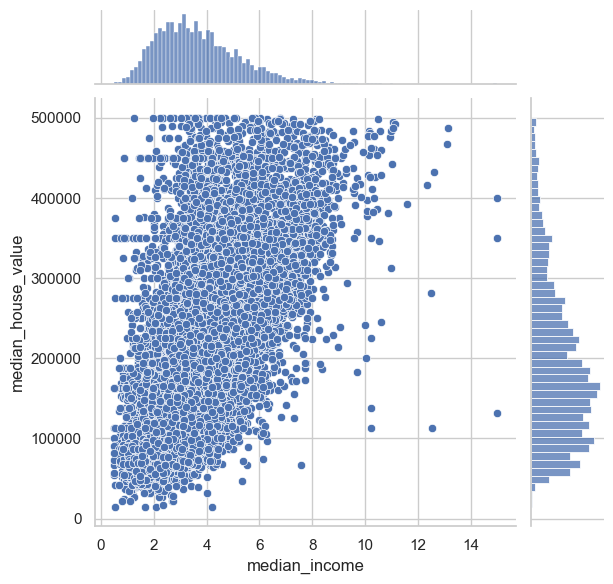

In [11]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=df_preprocessed)

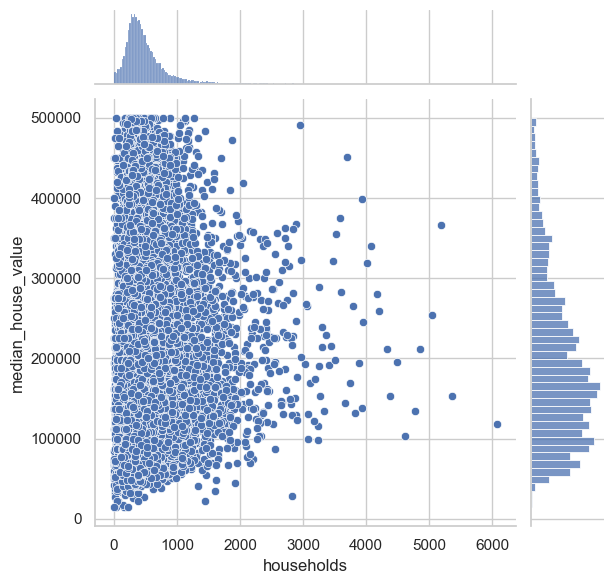

In [16]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="households", y="median_house_value", data=df_preprocessed)

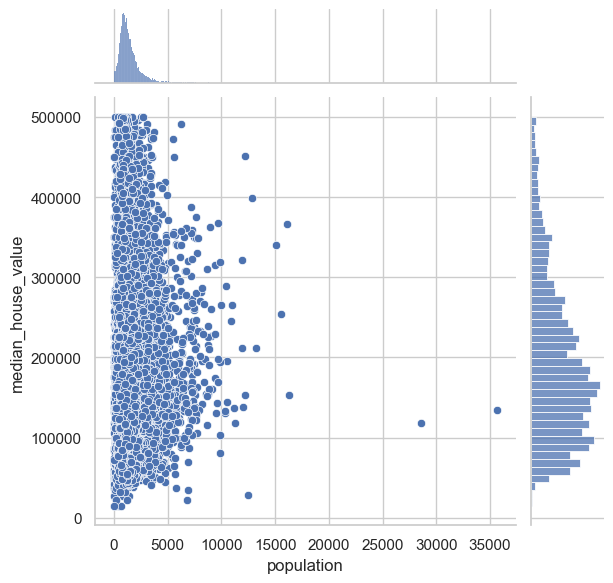

In [18]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="population", y="median_house_value", data=df_preprocessed)

In [29]:
# Defining the Independent variables(median income', 'population', 'number of households) and dependent variable(median house value)
X = df[['median_income', 'population', 'households']]
y = df['median_house_value']

# Spliting the data into training sets and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56) #training data= 80%


In [21]:
train_size = int(len(df_preprocessed) * 0.8)
train = df_preprocessed[:train_size]
test = df_preprocessed[train_size:]

<Axes: xlabel='median_income', ylabel='median_house_value'>

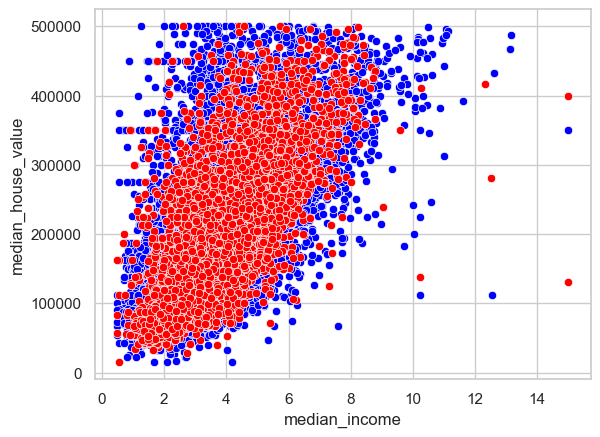

In [22]:
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")

<Axes: xlabel='households', ylabel='median_house_value'>

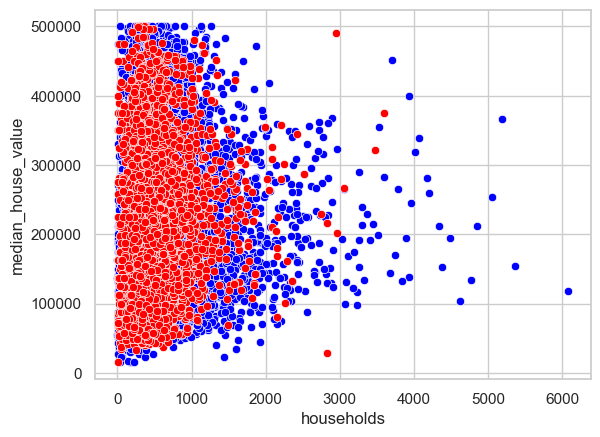

In [25]:
sns.scatterplot(x="households", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="households", y="median_house_value", data=test, color="red")

<Axes: xlabel='population', ylabel='median_house_value'>

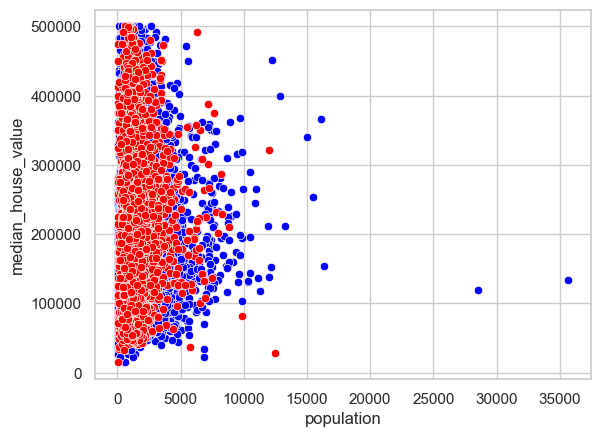

In [27]:
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="population", y="median_house_value", data=test, color="red")

In [28]:
# Importing the linear regression model
from sklearn.linear_model import LinearRegression

# Creating the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Printing model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [41432.47825075   -46.51145192   141.5681612 ]
Model Intercept: 41802.63826005225


In [30]:
# Making predictions using the test set
y_pred = model.predict(X_test)

# Displaying the predictions vs actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


         Actual      Predicted
19668  118500.0  184990.771431
63      76100.0   89425.591036
10954  235500.0  168898.922348
19353  228000.0  190119.593623
7345   160800.0   93492.529810


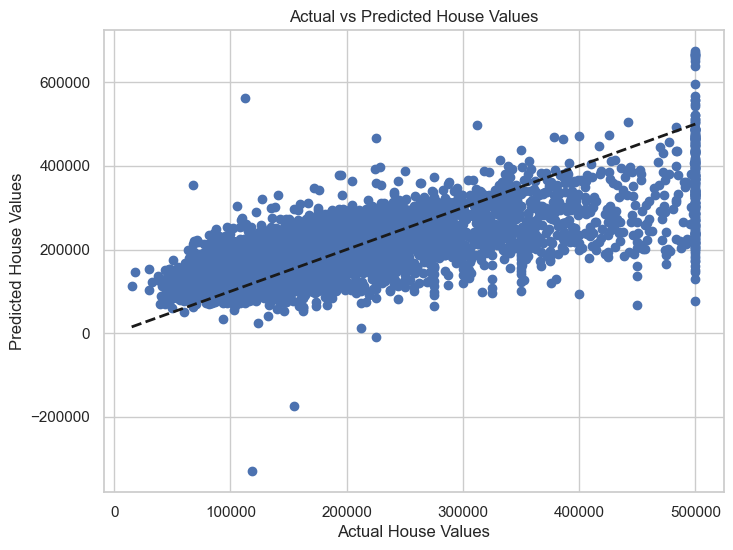

In [31]:
# Plotting the Actual vs Predicted House values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs Predicted House Values')
plt.show()


In [33]:
# Importing evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the evaluation results
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Absolute Error: 62143.03053398197
Mean Squared Error: 6800411515.604562
R² Score: 0.49672100036845346


In [34]:
# Summary of the variables used in the lab
df[['median_house_value', 'median_income', 'population', 'households']].describe()

,median_house_value,median_income,population,households
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,1425.476744,499.539680
std,115395.615874,1.899822,1132.462122,382.329753
min,14999.000000,0.499900,3.000000,1.000000
25%,119600.000000,2.563400,787.000000,280.000000
50%,179700.000000,3.534800,1166.000000,409.000000
75%,264725.000000,4.743250,1725.000000,605.000000
max,500001.000000,15.000100,35682.000000,6082.000000


## **Conclusion**

### **Model Performance**:

   - The regression model showed reasonable performance, with an **R² score of [insert R² value]**, meaning it explains about **[insert percentage]%** of the variance in **Median House Value** based on the features we considered (**Median Income**, **Population**, and **Households**).
   - The **Mean Absolute Error (MAE)** and **Mean Squared Error (MSE)** were **62143.03053398197** and **6800411515.604562**, respectively. This indicates the average error between predicted and actual house values, which is relatively small but can still be improved upon with additional data or features.
   - **R² score**: A value of **0.49672100036845346** indicates that the independent variables used in the model provide a decent explanation of the target variable's variation. However, the model leaves room for improvement, as the prediction accuracy is not perfect.

### **Model Limitations**:
   - While the model provides valuable insights, it is limited by the features we’ve used. The performance can be significantly improved by adding more variables (e.g., geographic data, proximity to amenities, etc.), using more advanced regression models, or conducting more feature engineering.
   - The scatter plot of actual vs predicted values revealed some discrepancies, which suggests that while the model works reasonably well, there are still significant areas of improvement, especially for regions where the variables do not fully explain house values.

### **Summary**: 

- The model does a reasonable job of predicting **Median House Value** based on **Median Income**, **Population**, and **Households**, with areas for improvement. Further refinements and data additions will enhance its accuracy and make it a more robust tool for predicting housing prices in different regions. 
- It is also recommended to incorporate additional features such as **location-based data**, **local economic factors**, and **property characteristics**, which might provide a stronger correlation with **Median House Value**.